In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
from utils import *

In [2]:
τ_coh = 0.01
n = 8 # number of segments (i.e., no. of repeaters -1 )
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)

Le2e_list = np.linspace(10,800,101) # e2e distance [km]
raw_rate_par = np.zeros(len(Le2e_list))
raw_rate_seq = np.zeros(len(Le2e_list))
skr_par = np.zeros(len(Le2e_list))
skr_seq = np.zeros(len(Le2e_list))
Fe2e_par = np.zeros(len(Le2e_list))
Fe2e_seq = np.zeros(len(Le2e_list))
raw_rate_par_no_cc = np.zeros(len(Le2e_list))
raw_rate_seq_no_cc = np.zeros(len(Le2e_list))
skr_par_no_cc = np.zeros(len(Le2e_list))
skr_seq_no_cc = np.zeros(len(Le2e_list))
Fe2e_par_no_cc = np.zeros(len(Le2e_list))
Fe2e_seq_no_cc = np.zeros(len(Le2e_list))

for i, Le2e in enumerate(Le2e_list):
    Ls = np.array([Le2e/n]*n)
    raw_rate_par[i], skr_par[i], Fe2e_par[i] = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True, Nmax=1e6)
    raw_rate_par_no_cc[i], skr_par_no_cc[i], Fe2e_par_no_cc[i] = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= False, Nmax=1e6)
    raw_rate_seq[i], skr_seq[i], Fe2e_seq[i] = T_sequential_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True)
    raw_rate_seq_no_cc[i], skr_seq_no_cc[i], Fe2e_seq_no_cc[i] = T_sequential_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= False)


/tmp/ipykernel_776801/3597637483.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  raw_rate_par[i], skr_par[i], Fe2e_par[i] = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True, Nmax=1e6)
/tmp/ipykernel_776801/3597637483.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  raw_rate_par_no_cc[i], skr_par_no_cc[i], Fe2e_par_no_cc[i] = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= False, Nmax=1e6)
/tmp/ipykernel_776801/3597637483.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this oper

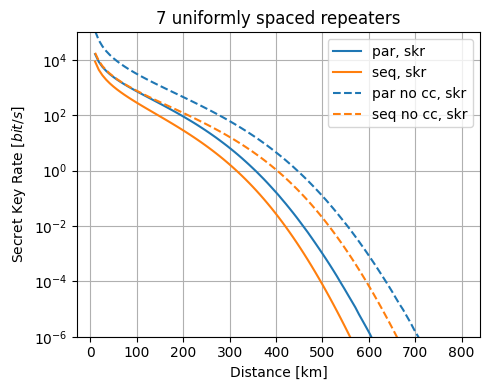

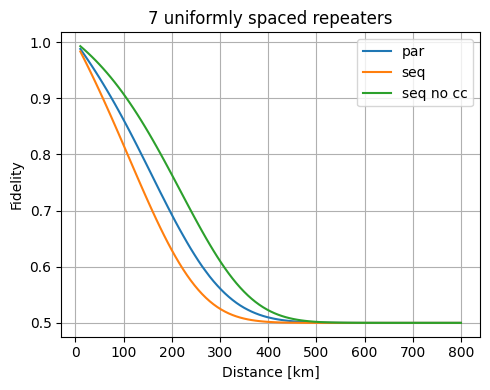

In [6]:
plt.figure(figsize=(5,4))
# plt.plot(Le2e_list,-np.log2(1-Trans(Le2e_list)),"k--", label="PLOB")
# plt.plot(Le2e_list,raw_rate_par,"-",color="C0", label="par, raw rate")
plt.plot(Le2e_list,skr_par,"-",color="C0", label="par, skr")
# plt.plot(Le2e_list,raw_rate_seq,"-",color="C1", label="seq, raw rate")
plt.plot(Le2e_list,skr_seq,"-",color="C1", label="seq, skr")
# plt.plot(Le2e_list,raw_rate_seq_no_cc,"-",color="C2", label="seq no cc, raw rate")
plt.plot(Le2e_list,skr_par_no_cc,"--",color="C0", label="par no cc, skr")
plt.plot(Le2e_list,skr_seq_no_cc,"--",color="C1", label="seq no cc, skr")
plt.yscale("log")
plt.xlabel("Distance [km]")
plt.ylabel(r"Secret Key Rate $[bit/s]$")
plt.ylim([1e-6,1e5])
plt.title(f"{n-1} uniformly spaced repeaters")
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("figs/par_vs_seq.pdf")
plt.show()


plt.figure(figsize=(5,4))
plt.plot(Le2e_list,Fe2e_par,"-",color="C0", label="par")
plt.plot(Le2e_list,Fe2e_seq,"-",color="C1", label="seq")
plt.plot(Le2e_list,Fe2e_seq_no_cc,"-",color="C2", label="seq no cc")
plt.title(f"{n-1} uniformly spaced repeaters")
# plt.yscale("log")
plt.xlabel("Distance [km]")
# plt.ylabel(r"$T_{mem}/τ_{coh}$")
plt.ylabel("Fidelity")
plt.grid()
plt.legend()
plt.tight_layout()
# plt.savefig("figures_realtime/one_repeater_fidelity_no_cutoff.pdf")
plt.show()
